Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Confusion Matrix:
[[500]]


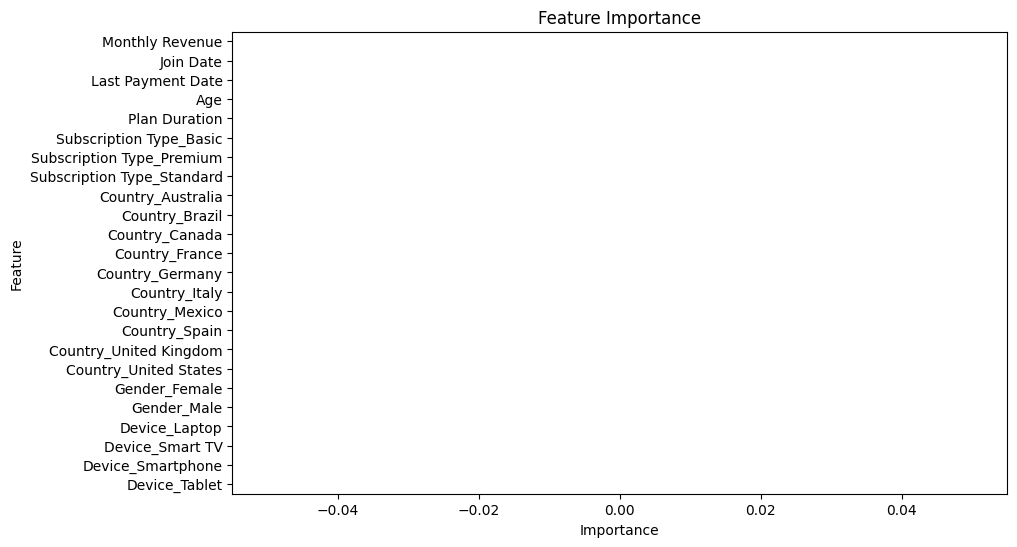

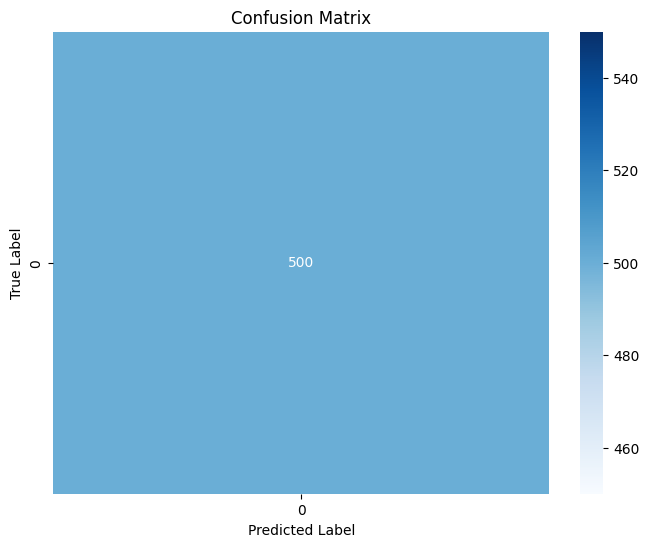

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Netflix dataset
data = pd.read_csv('netflix_data.csv')

# Data preprocessing
# Keep noted attributes
data = data[['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date',
             'Country', 'Age', 'Gender', 'Device', 'Plan Duration']]

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Subscription Type', 'Country', 'Gender', 'Device'])

# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Handle missing values
data.fillna(0, inplace=True)

# Define features and target variable
X = data.drop('User ID', axis=1)  # Exclude User ID from features
y = data['Plan Duration']  # Using Plan Duration as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualizations
# Plot feature importance
feature_importance = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
